In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [3]:
df = pd.read_csv('/content/user_behaviour_dataset.zip')
# print(df)

In [4]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
# print(df)

In [5]:
x = df[['Gender','Device Model','Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age']].values
y = df['User Behavior Class'].values

In [6]:
# # training,testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
# print(y_pred)
# print(y_test)

In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]


In [9]:
Logreg = LogisticRegression()
# fit the model with data
Logreg.fit(x_train,y_train)
# prediction
y_pred=Logreg.predict(x_test)
# print(y_pred)
# print(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)

precision = precision_score(y_test,y_pred, average='macro')
print("precision",precision)

recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')

print("F1 Score:",f1)
print("Recall:",recall)

accuracy 0.65
precision 0.6604126984126986
F1 Score: 0.6547588090254266
Recall: 0.6774327122153209


<function matplotlib.pyplot.show(close=None, block=None)>

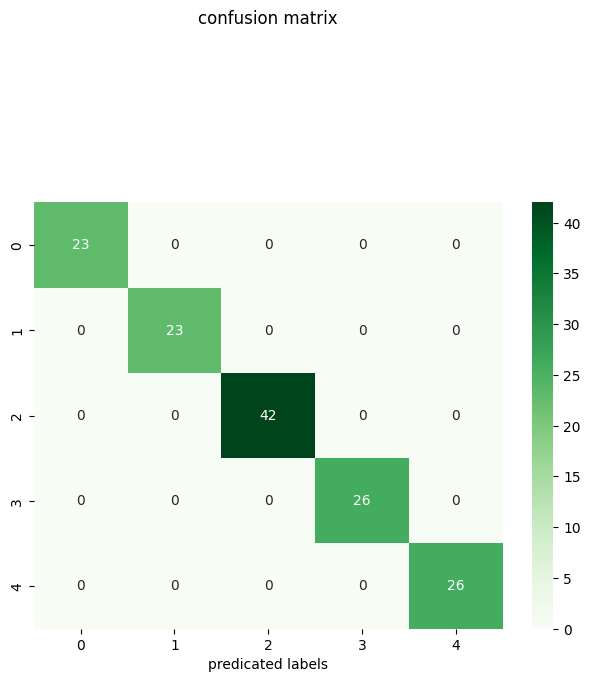

In [11]:
class_names= [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
print
# create headmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Greens",fmt="d",annot_kws={"size":10})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title("confusion matrix", y=1.4)
plt.xlabel('actual label')
plt.xlabel('predicated labels')
plt.show